# Lab 4 - Integration Exercises 

### Grading: 
We will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Switch back to the Version-0 branch in labs to do this work.  Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 5:00pm, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * __Every function should have a docstring.__
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.  Feel free to modify these prompts to suit the particular graph.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus. 

-----------------------------------------------------------------------------------------------
## from Newman w/ modifications and additions
-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - original problem.
-----------------------------------------------------------------------------------------------
In the on-line resources you will find a file called
```velocities.txt```, which contains two columns of numbers, the first
representing time~$t$ in seconds and the second the $x$-velocity in
 meters per second of a particle, measured once every second from time
$t=0$ to $t=100$.  The first few lines look like this:
```python
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
5	0.331656
```
Write a program to do the following:
* Read in the data and, using the trapezoidal rule, calculate from them
  the approximate distance traveled by the particle in the $x$ direction as
  a function of time.  See Section 2.4.3 on page 57 if you want a reminder
  of how to read data from a file.
* Extend your program to make a graph that shows, on the same plot,
  both the original velocity curve and the distance traveled as a function
  of time.
  
-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - notes and modifications.
-----------------------------------------------------------------------------------------------
This problem is funny - you can't use your algorithm for calculating the trapezoid method for a function, you have to do something quite different here - calculate the area of each trapezoid given both its legs.  You also need to store each step in an array, so you can plot the displacement as a function of time.  

I recommend you grab a whiteboard and work this out ahead of coding it.

Be sure to:
1.  Make separate plots for $x$ vs. $t$ and the $v$ vs. $t$ so you can see the details on $v$.
2.  Add labels to your plots - as many as needed to clearly convey the physics.
3.  Describe your plots physically - be sure to explain the relationship between the $x$ vs. $t$ to the $v$ vs. $t$, so it is clear the numerical integration is a good model for the given velocity data.

The trapezoidal rule gives the final distance to be 8.352839 meters.


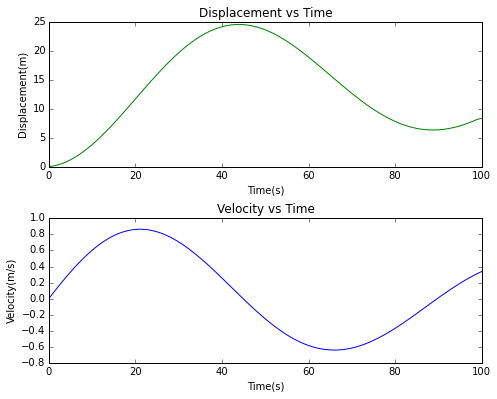

In [5]:
### YOUR Solutions Newman 5.1
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#INSERT YOUR SOLUTION HERE:
velocity = np.loadtxt("velocities.txt",float)
N = len(velocity)
a1 = velocity[0,1]
b1 = velocity[N-1,1]
h = (1)
D = [0]
V = [a1]

s = 0.5*(a1)
for k in range(1,N-1):
    s += (velocity[k,1] + velocity[k+1,1])/2
    D.append(s)
    V.append(velocity[k,1])
    
s += 0.5*b1
D.append(s)
V.append(b1)

#make the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 5.6))

ax1.plot(D,"g")
ax1.set_ylabel("Displacement(m)")
ax1.set_xlabel("Time(s)")

ax2.plot(V)
ax2.set_ylabel("Velocity(m/s)")
ax2.set_xlabel("Time(s)")

ax1.set_title("Displacement vs Time")
ax2.set_title("Velocity vs Time")
plt.tight_layout()

print("The trapezoidal rule gives the final distance to be",s, "meters.")

The plots above show two curves the top being the distancec vs time, which was calculated using the sum of the area under the curve for the velocity vs time curve that is show below. The graphs make sense because the velocity graph appers to be the derivative of the distance graph. We know that this should be true do to what we learned in workshop physics. Also it makes sense that when you take the integral of the velocity and plot it you recieve the distance because we also learned that the integral is just evaluateing the antiderivative over a distance. 

When looking at the graphs from a physics point of view you see that as the velocity increases over time the displace ment does too. When the velocity is at its highest the distance curve has the greatest slope. Then the velocity hits zero and then negative, the displacement becomes stops at a certain distance and  starts going back towards zero. If you look at the curves you see that the velocity a each time corresponds to the slope of the displacement graph at that same time.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - original problem.
-----------------------------------------------------------------------------------------------
Consider the integral
$$
E(x) = \int_0^x e^{-t^2} dt.
$$
1. Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1.  Choose for yourself what method you will use for
  performing the integral and a suitable number of slices.
  
2. When you are convinced your program is working, extend it further to
  make a graph of $E(x)$ as a function of $x$.  If you want to remind
  yourself of how to make a graph, you should consult Section 3.1, starting
  on page 88.

Note that there is no known way to perform this particular integral
analytically, so numerical approaches are the only way forward.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - notes and modifications.
-----------------------------------------------------------------------------------------------

The Gaussian integral does have analytic solutions in the limit from $-\infty$ to $\infty$.
It is a very usefull and famous integrals, and there are many fun ways to work 
out useful solutions.  For instance: 
$$
\int_{-\infty}^{\infty} e^{-t^2} dt = \sqrt{\pi}
$$
ref: https://en.wikipedia.org/wiki/Gaussian_integral

Calculate the Gaussian interval over an even interval (for instance a=-1, b=1) and check that you get the expected result under reasonable numerical approximations.  Check this for several intervals.  Calculate the percent difference between your value and the expected as the interval grows larger.  At when does your integral agree with the exact result within rounding error?  Make a table summarizing your work, and plot of $b$ vs. $error$ to show this.

Make a plot of the function $E(x)$ vs. $x$ along with the integral both for Newman's example and the additional question.

0.8862067342802121


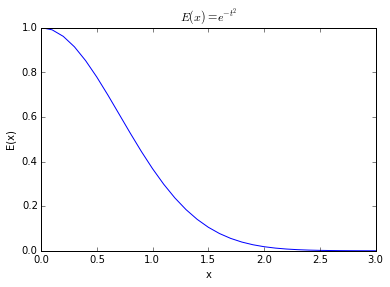

In [6]:
# Origirnal 5.3
from math import exp

def func(x):
    '''Take in a variable x that inputs the value into a function of x and returns a value y
    
    x - value being input for evaluation'''
    
    y = exp(-(x**2))
    return y

t = np.linspace(0,3,31,endpoint = True)
N = 30
a = 0
b = 3
h = (b-a)/N

# Solve for the first two parts of the equation in the extended trapezoidal rule then run a loop that is similar to a reimann 
# sum in the way it runs for all the N loops and sums the value to the total.
s = 0.5*(func(a))
for i in range(1,N):
    s += func(a+i*h)

s += 0.5*(func(b))

f =[]
for j in range(len(t)):
    f.append(func(t[j]))
    
plt.plot(t,f)
plt.xlabel("x")
plt.ylabel("E(x)")
plt.title("$E(x) =  e^{-t^2}$")
print(h*s)

The graph above shows the right half of a Gaussian curve. We use this curve because we know the exact value of the integral for this curve. Knowing that we can compare our later values to this number.

The integral for exp(-t^2) in the interval ( -1 , 1 ) is 1.4936482656251182 with and error of 15.729920705013603 %
The integral for exp(-t^2) in the interval ( -1.5 , 1.5 ) is 1.7123767872489475 with and error of 3.3894853525171373 %
The integral for exp(-t^2) in the interval ( -2 , 2 ) is 1.7641627815227598 with and error of 0.46777349822226794 %
The integral for exp(-t^2) in the interval ( -5 , 5 ) is 1.7724538509027954 with and error of 1.534872401981937e-10 %
The integral for exp(-t^2) in the interval ( -7 , 7 ) is 1.772453850905515 with and error of 5.011010127267179e-14 %
The integral for exp(-t^2) in the interval ( -10 , 10 ) is 1.7724538509055159 with and error of 0.0 %
The integral for exp(-t^2) in the interval ( -12 , 12 ) is 1.7724538509055157 with and error of 1.2527525318167948e-14 %
The integral for exp(-t^2) in the interval ( -15 , 15 ) is 1.7724538509055157 with and error of 1.2527525318167948e-14 %
The integral for exp(-t^2) in the interval ( -20 , 20 ) is 1.7724538509

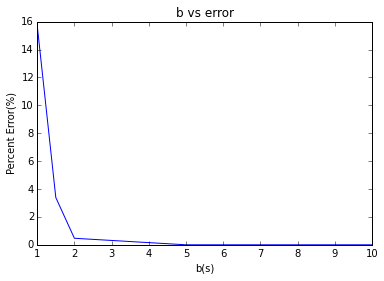

In [7]:
#If you sunk Lab 4 with the original repository,
#you'll find the file integrate.py
#this is a lesson in how you could write your own functions, store them in a file
#and treat that as a file you may import.
#notice that I can print the docstring - 
#you may do this for any python function that has a docstring

import integrate 
import math
t = [1,1.5,2,5,7,10,12,15,20]
actual = math.sqrt(math.pi)
N = 1000
err = []

def func(x):
    '''Take in a variable x that inputs the value into a function of x and returns a value y'''
    y = math.exp(-(x**2))
    return y

#print(help(integrate.integrate))
for i in range(len(t)):
    I = integrate.integrate(func,(-t[i],t[i]),N,order = 2)[0]
    Error = abs(I-actual)/actual*100
    err.append(Error)
    print("The integral for exp(-t^2) in the interval (",-t[i],",",t[i],") is",I,"with and error of",Error,"%")
plt.plot(t,err)
plt.xlim(1,10)
plt.xlabel("b(s)")
plt.ylabel("Percent Error(%)")
plt.title("b vs error")

Above we have a curve that resembles the percent error based on the interval we are integrating on. The y-axis shows the percent error and the x-axis is the positive limit for integration. This graph shows that for values less than two that the percent error is so bad that the value is irrelevant. Once you hit two there is a small amount of agorithmic error then you hit ten and the error becomes all round off.

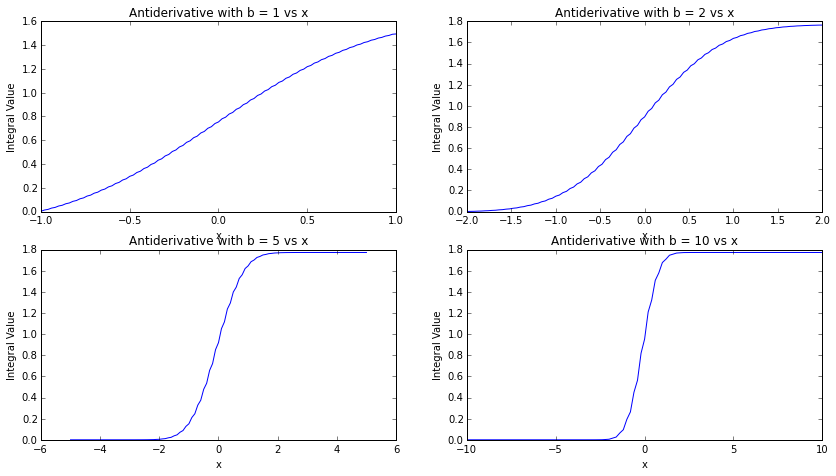

In [8]:
t1 = [1,2,5,10]
N = 100

I0,x_array0,I_array0 = integrate.integrate(func,(-t1[0],t1[0]),N,order = 2)
I1,x_array1,I_array1 = integrate.integrate(func,(-t1[1],t1[1]),N,order = 2)
I2,x_array2,I_array2 = integrate.integrate(func,(-t1[2],t1[2]),N,order = 2)
I3,x_array3,I_array3 = integrate.integrate(func,(-t1[3],t1[3]),N,order = 2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 7.5)) #(ax1, ax2, ax3, ax4)
ax1.plot(x_array0,I_array0)
ax1.set_ylabel("Integral Value")
ax1.set_xlabel("x")

ax2.plot(x_array1,I_array1)
ax2.set_ylabel("Integral Value")
ax2.set_xlabel("x")

ax3.plot(x_array2,I_array2)
ax3.set_ylabel("Integral Value")
ax3.set_xlabel("x")

ax4.plot(x_array3,I_array3)
ax4.set_ylabel("Integral Value")
ax4.set_xlabel("x")

ax1.set_title("Antiderivative with b = 1 vs x")
ax2.set_title("Antiderivative with b = 2 vs x")
ax3.set_title("Antiderivative with b = 5 vs x")
ax4.set_title("Antiderivative with b = 10 vs x")

The 4 graphs above plot the integral of the Gaussian function. The four graphs are for b = 1,2,5,10 where 10 is the most accurate graph. This shows that when you evaluate the function form one to one then the graph appers to have a large area but seams to be for an almost flat line. As you increase b you can tell that the shape has a lot more curve then shown in the beginning. Also when looking at the graphs you see that the area approaches 1.77 whic is the exact anser for the integral.

### Newman Exercise 5.4: The diffraction limit of a telescope

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) ~d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$.
1. Write a Python function ```J(m,x)``` that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.
2. Make a second program that makes a density plot of the intensity of
   the circular diffraction pattern of a point light source with
   $\lambda=500$ nm, in a square region of the focal plane, using the
   formula given above.  Your picture should cover values of $r$ from zero
   up to about $1\,\mu$m.


*Hint 1:* You may find it useful to know that $\lim_{x\to0} J_1(x)/x = 1/2$.  

*Hint 2:* The central spot in the diffraction pattern is
so bright that it may be difficult to see the rings around it on the
computer screen.  If you run into this problem a simple way to deal with it
is to use one of the other color schemes for density plots described in
Section~3.3.  The ``hot`` scheme works well.  For a more
sophisticated solution to the problem, the ``imshow`` function has an
additional argument ``vmax`` that allows you to set the value that
corresponds to the brightest point in the plot.  For instance, if you say
``imshow(x,vmax=0.1)``, then elements in ``x`` with value 0.1, or
any greater value, will produce the brightest (most positive) color on the
screen.  By lowering the ``vmax`` value, you can reduce the total range
of values between the minimum and maximum brightness, and hence increase
the sensitivity of the plot, making subtle details visible.  (There is also
a ``vmin`` argument that can be used to set the value that corresponds
to the dimmest (most negative) color.)  For this exercise a value of
``vmax=0.01`` appears to work well.

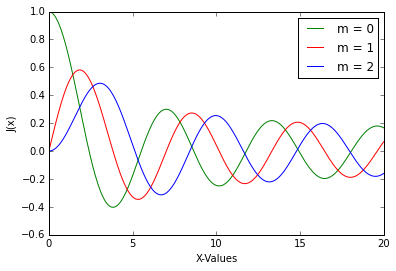

In [9]:
#DM I've written the Bessel function code to get you started
#but you need to figure out how to call it and use it

def J(m,x):
    '''Calculate the Bessel function'''
    N = 100
    a = 0
    b = math.pi
    
    def f_theta(theta):
        '''Take in a variable theta that inputs the value into a function of theta and returns a value func_arg'''
        func_arg = 1/math.pi * math.cos(m*theta - x*math.sin(theta))
        return func_arg         
        
    I = integrate.integrate(f_theta,(a,b),N,order=2)[0]
    
    return I


#######################################
#Part 1 - plotting the Bessel Function
#######################################
y0 = []
y1 = []
y2 = []

xval = np.linspace(0,20,1000)

for i in xval:
    y0.append(J(0,i))
    
for j in xval:
    y1.append(J(1,j))

for k in xval:
    y2.append(J(2,k))
    
plt.plot(xval,y0,"g",label = "m = 0")
plt.plot(xval,y1,"r",label = "m = 1")
plt.plot(xval,y2,"b",label = "m = 2")
plt.xlabel("X-Values")
plt.ylabel("J(x)")
plt.legend(loc = "best")

Above is three curves that are created using the Bessel functions which are important math functions that are useful in physics. The curves seem to be wave functions that are decaying over the distance. Each curve correlates to the function with a different m, ranging from 0 to 2, including 2.

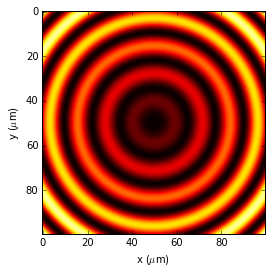

In [15]:
#I've given you some dimensions to get you started, 
# code up the diffraction pattern from here

#########
#Part 2 - plotting the diffraction pattern
#########
lambda1 = 500e-9          #500 nm
k = 2.0*math.pi/lambda1   
x_max=1e-6                #1 micron - make this the the approximate scale of your problem
N = 100 
xy_grid = np.empty([N,N],float)

x_array = np.linspace(-x_max,x_max,N)
y_array = np.linspace(-x_max,x_max,N)

for i in range(len(x_array)):
    for j in range(len(y_array)):
        
        x = x_array[i]
        y = y_array[j]
        r = math.sqrt(y**2+x**2)
        if abs(r)<1e-9:
            xy_grid[i][j] = 0.5
        else:    
            xy_grid[i][j] = (J(1,k*r)/k*r)**2
    
plt.imshow(xy_grid)
plt.xlabel(r"x ($\mu$m)")
plt.ylabel(r"y ($\mu$m)")
plt.hot()

The graph above is a density plot that is showing the intensity of the diffraction pattern of a point light source that has a lambda of 500nm. The middle is a bright spot that is there because the light is traveling through the circle of the telescope. The ripples around the edges are caused by the bending of the light due to the edges of the circle. The light bending allow the phase shift to interfere both constructively and destuctively. The interference give the high and low look.